In [58]:
import spacy
import seaborn as sns
import os
from scipy import stats
import pandas as pd
import numpy as np
from spacy.matcher import Matcher
import statsmodels
from nltk.corpus import stopwords
from utils import *

In [62]:
p = '/export/b15/afavaro/stable-ts/German'
path = [os.path.join(p, file) for file in os.listdir(p)]
transcripts = []
for m in path:
    if m.endswith(".wav.txt"):
        transcripts.append(os.path.join(p, m))

tasks=[]
label__ =[]
name_id = []
full_name =[]
transc = []

for every in transcripts:
    full_name.append(os.path.basename(every.split(".wav")[0]))
    name_id.append(os.path.basename(every).split('_',1)[1].split("_")[0])
    m = os.path.basename(every)
    tasks.append(m.split("_", -1)[2])#.split("_")
    label__.append(m.split("_")[0])
    with open(every, "r") as f:
        string_without_line_breaks = ""
        for line in f:
            stripped_line = line.rstrip()
            string_without_line_breaks += stripped_line
        transc.append(string_without_line_breaks)

df= pd.DataFrame(
    {'idx': name_id, 
     'sentence': transc,
     'label': label__,
     'task': tasks, 
     'names': full_name
    })
df = df.dropna()
df['sentence'] = df['sentence'].str.lower()

In [69]:
# Load pretrained model for German
nlp = spacy.load("de_core_news_sm")
# Create a function to preprocess the text
stopwords = list(stopwords.words('german'))

def preprocess(text):
    '''This is a function to perform tokenization, lemmatization, removal of non-alphabetic characters
    and stopword removal'''
  # Create Doc object
    doc = nlp(text, disable=['ner'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    return ' '.join(a_lemmas)
df['Item'] = df['sentence'].apply(preprocess)

In [70]:
def count_words(string):
    '''This function returns the number of words in a string'''
    # Split the string into words
    words = string.split()
    # Return the number of words
    return len(words)

df['Word_Count'] = df['sentence'].apply(count_words)
df['Word_Count_No_stop_words'] = df['Item'].apply(count_words)

In [72]:
def word_length(string):
    '''This function returns the average word length in characters for the words in an item'''
    #Get the length of the full text in characters
    chars = len(string)
    #Split the string into words
    words = string.split()
    #Compute the average word length and round the output to the second decimal point
    avg_word_length = chars/len(words)
    return round(avg_word_length, 2)

#Application to the preprocessed data
df['Avg_Word_Length'] = df['sentence'].apply(word_length)

In [73]:
def sentence_counter(text):
    '''This function returns the number of sentences in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    counter = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sentence in doc.sents:
        counter = counter + 1
    return counter

#Note that this function is applied to the raw text in order to identify sentence boundaries

df['Sentence_Count'] = df['sentence'].apply(sentence_counter)

In [74]:
def avg_sent_length(text):
    '''This function returns the average sentence length in an item'''
    doc = nlp(text)
    #Initialize a counter variable
    sent_number = 0
    #Update the counter for each sentence which can be found in the doc.sents object returned by the Spacy model
    for sent in doc.sents:
        sent_number = sent_number + 1
    #Get the number of words
    words = text.split()
    #Compute the average sentence length and round it to the second decimal point
    avg_sent_length = len(words)/sent_number
    return round(avg_sent_length, 2)

#Note that this function is applied to the raw text in order to identify sentence boundaries
df['Avg_Sent_Length_in_Words'] = df['sentence'].apply(avg_sent_length)
#df.head()

In [75]:
def nouns(text, model=nlp):
    '''This function returns the number of nouns in an item'''
    # Create doc object 
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of nouns
    return pos.count('NOUN')

df['Noun_Count'] = df['Item'].apply(nouns)

In [76]:
def verbs(text, model=nlp):
    '''This function returns the number of nouns in an item'''
    # Create doc object 
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of nouns
    return pos.count('VERB')

df['Verb_Count'] = df['Item'].apply(verbs)

In [77]:
def adverbs(text, model=nlp):
    '''This function returns the number of adverbs in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('ADV')
df['Adverb_Count'] = df['Item'].apply(adverbs)

In [78]:
def numeral(text, model=nlp):
    '''This function returns the number of numerals (e.g., billion) in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('NUM')
df['Numeral_Count'] = df['sentence'].apply(numeral) #meglio estrarlo dall'originale

In [79]:
def aux(text, model=nlp):
    '''This function returns the number of auxiliary in an item'''
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    # Return number of adverbs
    return pos.count('AUX')
df['Auxiliary_Count'] = df['sentence'].apply(aux) #meglio estrarlo dall'originale

In [80]:
def get_nps(text):
    '''This is a function that outputs the number of noun phrases in an item'''
    doc = nlp(text)
    NP_count = 0
    for np in doc.noun_chunks:
        NP_count = NP_count + 1
    return NP_count
    #print(np)

df['Number_of_NPs'] = df['Item'].apply(get_nps)

In [81]:
def get_pps(text):
    '''This is a function that outputs the number of prepositional phrases in an item'''
    doc = nlp(text)
    pps = 0
    for token in doc:
        # You can try this with other parts of speech for different subtrees.
        if token.pos_ == 'ADP':
            
            #Use the command below if you wanted to get the actual PPs
            #pp = ' '.join([tok.orth_ for tok in token.subtree])
            
            #This command counts the number of PPs
            pps = pps + 1
            
    return pps

df['Number_of_PPs'] = df['Item'].apply(get_pps)

In [82]:
pattern = [{'POS': 'VERB', 'OP': '?'},
           {'POS': 'ADV', 'OP': '*'},
           {'POS': 'AUX', 'OP': '*'},
           {'POS': 'VERB', 'OP': '+'}]

def get_vps(text):
    '''This function returns the number of verb phrases in an item'''
    doc = nlp(text)
    vps = 0
    # instantiate a Matcher instance
    matcher = Matcher(nlp.vocab)
    matcher.add("Verb phrase", [pattern], on_match=None) #new syntax of the command
    # call the matcher to find matches 
    matches = matcher(doc)
    spans = [doc[start:end] for _, start, end in matches]
    for match in matches:
        vps = vps +1
    return vps
    
df['Number_of_VPs'] = df['Item'].apply(get_vps)
df = df.drop(columns=['sentence'])
df = df.drop(columns=['Item'])

In [85]:
# Group by task
task_grouped_ = df.groupby('task')
monologue = task_grouped_.get_group("monologue")
task = monologue.columns[4:].values.tolist()

['Word_Count',
 'Word_Count_No_stop_words',
 'Avg_Word_Length',
 'Sentence_Count',
 'Avg_Sent_Length_in_Words',
 'Noun_Count',
 'Verb_Count',
 'Adverb_Count',
 'Numeral_Count',
 'Auxiliary_Count',
 'Number_of_NPs',
 'Number_of_PPs',
 'Number_of_VPs']

In [ ]:
grouped = monologue.groupby('label')
control = grouped.get_group("CN") 
parkinson_ = grouped.get_group("PD")
task = monologue.columns[4:].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(monologue.columns[4:])])
control_all_feat = np.array([control[feat] for feat in np.array(monologue.columns[4:])])

with open('/export/b15/afavaro/Frontiers/submission/GERMAN/LINGUISTIC/mon_.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/GERMAN/LINGUISTIC/mon_.txt')
holm_correction(kruskal_1)

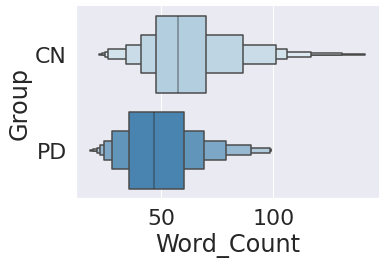

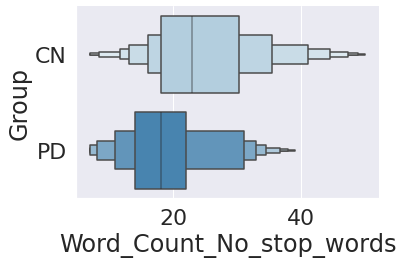

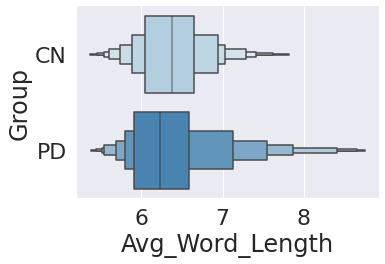

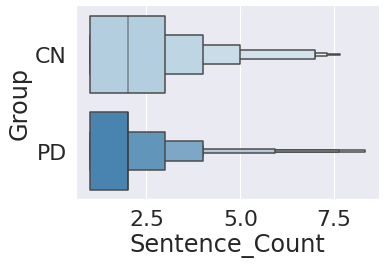

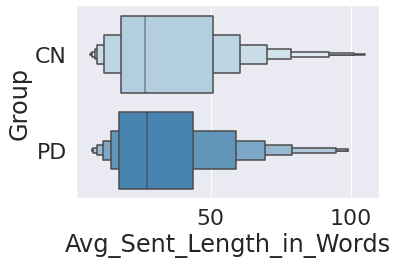

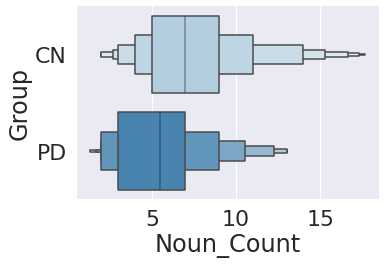

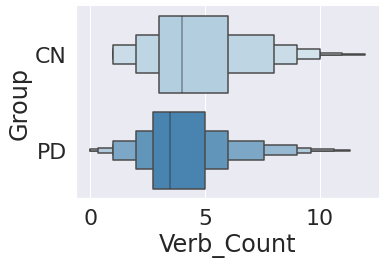

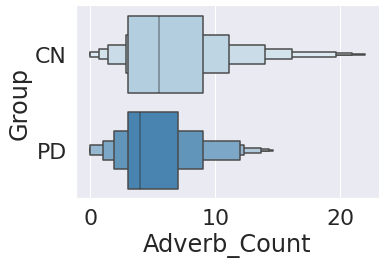

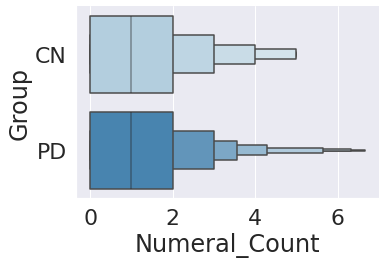

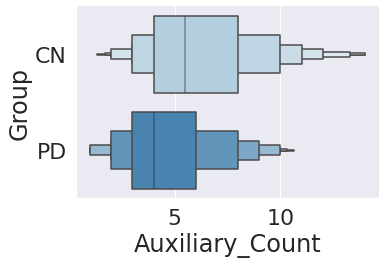

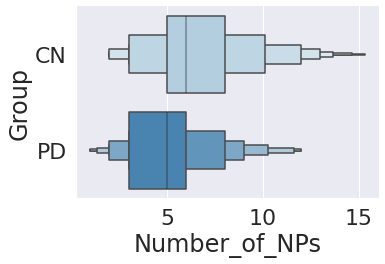

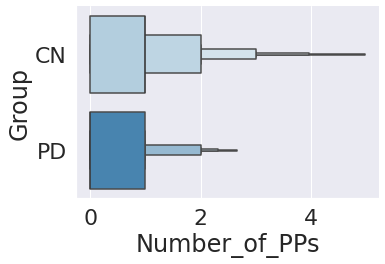

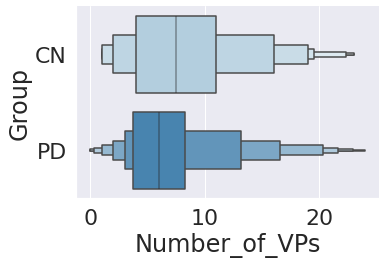

In [88]:
for i, title in enumerate(task):  
    
    nome = title
    controls = []
    parkinson=[]
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]
    [controls.append('CN') for value in range(len(control_all_feat[i]))]
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)